In [2]:
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib

from scipy.interpolate import lagrange
import numpy.polynomial.polynomial as poly

from halton import halton_sequence

In [3]:
matplotlib.rcParams.update({'font.size': 14})

In [4]:
n = 100
eps = 800
#pnts = 'halton'
pnts = 'equal'

def foo(x):
    return np.exp(-np.cos(10*np.pi*x) * x)

def rbf(r, eps):
    return np.exp(-(eps*r)**2)
    #return r**5

if pnts == 'halton':
    xs = np.zeros(n)
    xs[1:-1] = halton_sequence(1, (n-2), 1).flatten() #generates n halton points between 0 and 1
    xs[0] = 0 # add the interior points
    xs[-1] = 1
elif pnts == 'equal':
    xs = np.linspace(0,1,n)

zs = np.linspace(0,1, 1000)

Vandermonde condition number = 		2.08781e+19
Radial Basis condition number = 	1


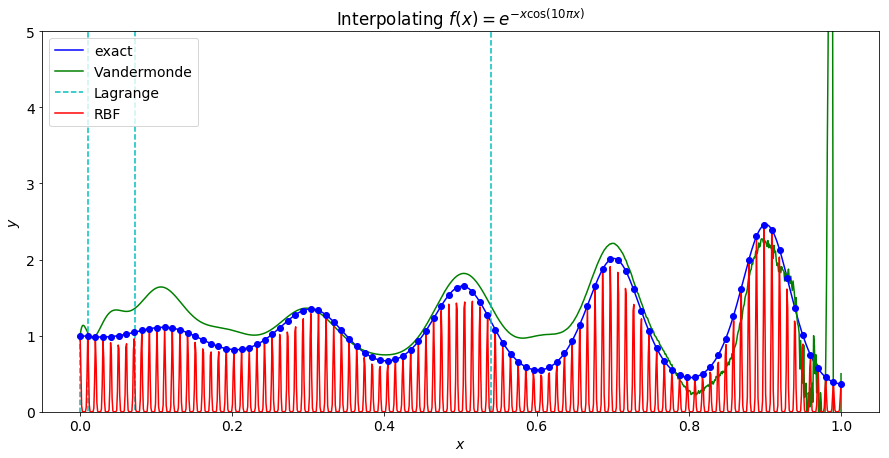

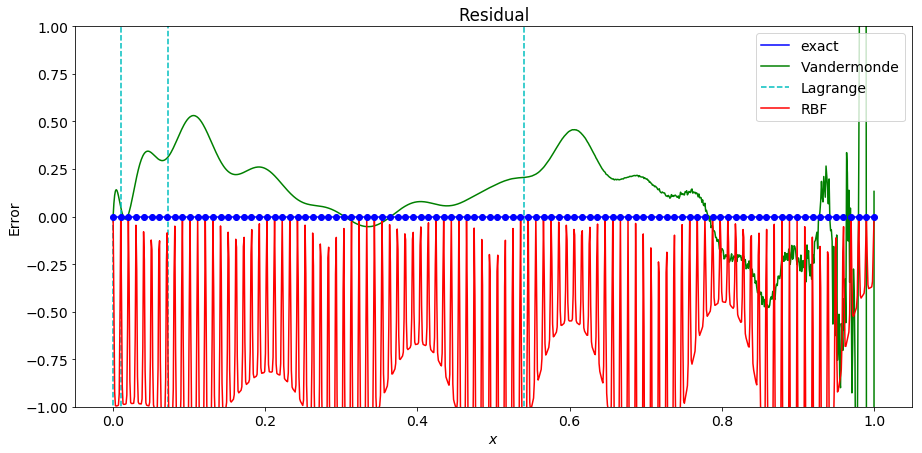

In [5]:
A = xs.reshape((n,1)) ** np.arange(n)
print('Vandermonde condition number = \t\t%g' % la.cond(A))
cs = la.solve(A, foo(xs))
A_new = zs.reshape((len(zs),1)) ** np.arange(n)
van = A_new @ cs

l_poly = lagrange(xs, foo(xs))
l_poly_pnts = l_poly(zs)

A = rbf(np.abs(np.subtract.outer(xs,xs)), eps)
print('Radial Basis condition number = \t%g' % la.cond(A))

cs = la.solve(A, foo(xs))

A_new = rbf(np.abs(np.subtract.outer(zs,xs)), eps)

rbf_interp = A_new @ cs


fig = plt.figure(figsize=(15,7))
plt.plot(zs, foo(zs), 'b-')
plt.plot(zs, van, 'g-')
plt.plot(zs, l_poly_pnts, 'c--')
plt.plot(zs, rbf_interp, 'r-')
plt.plot(xs, foo(xs), 'bo')
plt.ylim((0, 5))
plt.legend(['exact', 'Vandermonde', 'Lagrange', 'RBF'])
plt.title('Interpolating $f(x) = e^{-x\cos(10\pi x)}$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

fig = plt.figure(figsize=(15,7))
plt.plot(zs, [0]*len(zs), 'b-')
plt.plot(zs, van-foo(zs), 'g-')
plt.plot(zs, l_poly_pnts-foo(zs), 'c--')
plt.plot(zs, rbf_interp-foo(zs), 'r-')
plt.plot(xs, [0]*n, 'bo')
plt.legend(['exact', 'Vandermonde', 'Lagrange', 'RBF'])
plt.title('Residual')
plt.xlabel('$x$')
plt.ylabel('Error')
y_max = np.max(np.abs(rbf_interp-foo(zs)))*1.1
y_max = np.min([y_max, 1])
plt.ylim((-y_max,y_max))
plt.show()

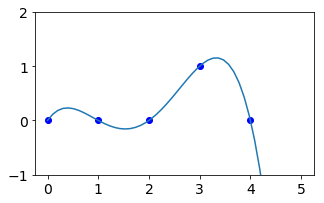

In [8]:
xs = range(5)
ys = [0,0,0,1,0]
l_poly = lagrange(xs,ys)
zs = np.linspace(0,5)
fig = plt.figure(figsize=(5,3))
plt.plot(xs, ys, 'bo')
plt.plot(zs, l_poly(zs))
plt.ylim((-1,2))
plt.show()

# Shape Parameter Selection

Radial Basis condition number = 	1


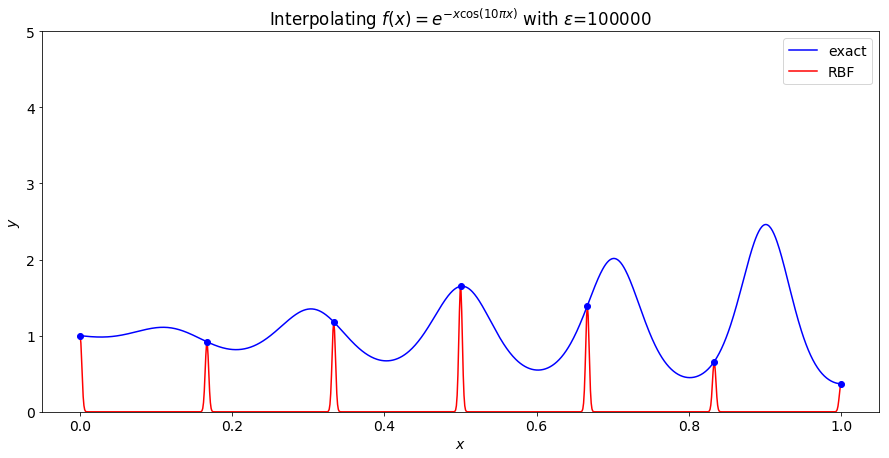

In [6]:
n = 7
eps = 10**5

def foo(x):
    return np.exp(-np.cos(10*np.pi*x) * x)

def rbf(r, eps):
    return np.exp(-eps * r**2)
    
xs = np.linspace(0,1,n)
zs = np.linspace(0,1, 1000)

A = rbf(np.abs(np.subtract.outer(xs,xs)), eps)
print('Radial Basis condition number = \t%g' % la.cond(A))

cs = la.solve(A, foo(xs))
A_new = rbf(np.abs(np.subtract.outer(zs,xs)), eps)

rbf_interp = A_new @ cs

fig = plt.figure(figsize=(15,7))
plt.plot(zs, foo(zs), 'b-')
plt.plot(zs, rbf_interp, 'r-')
plt.plot(xs, foo(xs), 'bo')
plt.ylim((0, 5))
plt.legend(['exact', 'RBF'])
plt.title('Interpolating $f(x) = e^{-x\cos(10\pi x)}$ with $\\varepsilon$=%d' % eps)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

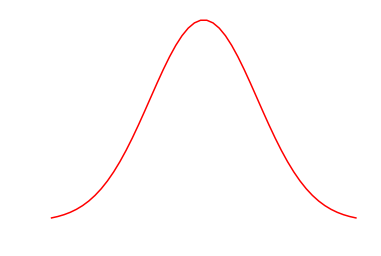

In [10]:
plt.axis('off')
plt.plot(np.linspace(-2,2), rbf(np.linspace(-2,2), 1), 'r-')